# **PRÁCTICA 2: AUTOENCODERS - Parte 1: Densos**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

# Prelaboratorio:




- Lee y entiende la documentación de Keras del modelo funcional:
https://keras.io/getting-started/functional-api-guide/

Tienes ejemplos de ayuda aquí:
https://drive.google.com/drive/folders/1H4Hmz7TfHsmCrtZcQEFfPRenfZun6YYn?usp=sharing

- Lee y entiende los notebooks de la práctica, lánzalos y comprueba que todo funciona bien.

# Laboratorio

Autoencoders con Keras

https://blog.keras.io/building-autoencoders-in-keras.html

## Autoencoder con una capa

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [ ]:
# dimension de dominio intermedio
encoding_dim = 32  

input_img = Input(shape=(784,))
# ENCODER
encoded = Dense(encoding_dim, activation='relu')(input_img)
# DECODER
decoded = Dense(784, activation='sigmoid')(encoded)

# AUTOENCODER
autoencoder = Model(input_img, decoded)

In [ ]:
# Modelo para el encoder
encoder = Model(input_img, encoded)

In [ ]:
# placeholder
encoded_input = Input(shape=(encoding_dim,))
# capa del decoder
decoder_layer = autoencoder.layers[-1]
# Modelo del decoder
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='MSE')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# DATOS
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# ENTRENAMIENTO
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 5ms/step - loss: 0.0717 - val_loss: 0.0422
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0358 - val_loss: 0.0300
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0267 - val_loss: 0.0232
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0215 - val_loss: 0.0194
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0185 - val_loss: 0.0169
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0162 - val_loss: 0.0149
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0145 - val_loss: 0.0135
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0124
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0123 - val_loss: 0.0116
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0117 - val_loss: 0.0111

In [ ]:
# APLICACION EN TEST
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Mismo que
# decoded_imgs = autoencoder.predict(x_test)

### Reconstrucción

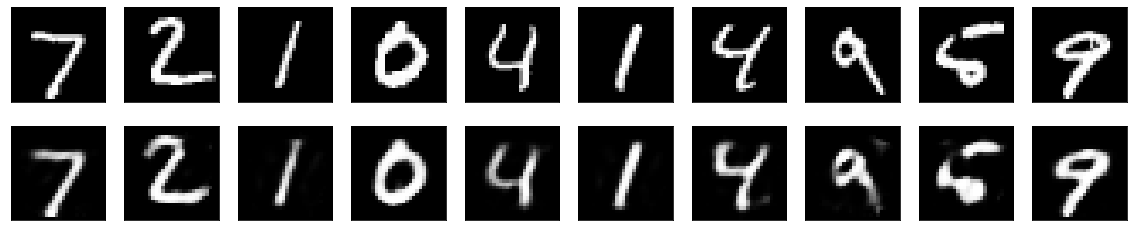

In [ ]:

import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruccion
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Aplicaciones

### Limpieza de imágenes ruidosas (random noise)

In [ ]:
# Creamos datos ruidosos. Prueba con diferentes fatores 0.2, 0.3, 0.5 para ver como afecta a las imágenes reconstruidas
x_test_nois = x_test + 0.5*np.random.randn(x_test.shape[0],x_test.shape[1])
encoded_imgs = encoder.predict(x_test_nois)
decoded_imgs = decoder.predict(encoded_imgs)

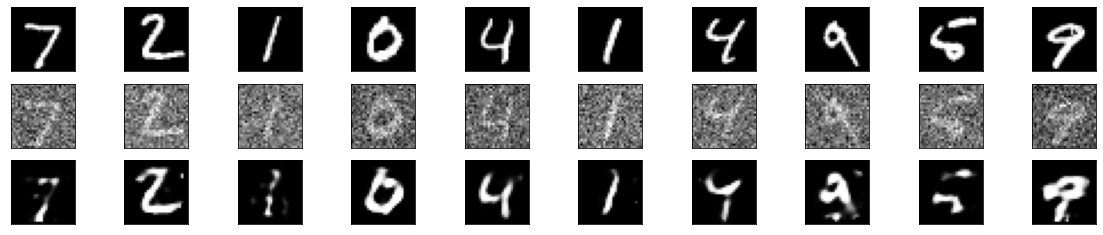

In [ ]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imágenes originales
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Imágenes ruidosas (random noise)
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_nois[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstrucción (salida del decoder)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Detección de anomalías

#### Ejemplo con los datos ruidosos

In [ ]:
import numpy as np
# calculamos el error en los datos normales y ruidosos

ncoded_imgs = encoder.predict(x_test_nois)
x_test_nois_pred = decoder.predict(encoded_imgs)
error_nois = np.mean(np.abs(x_test_nois-x_test_nois_pred)**2,tuple(range(1, x_test_nois.ndim)))

x_test_pred = autoencoder.predict(x_test)
error_tes = np.mean(np.abs(x_test-x_test_pred)**2,tuple(range(1, x_test_pred.ndim)))

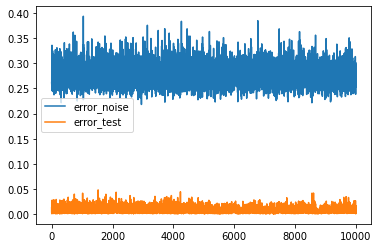

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(error_nois,label="error_noise")
plt.plot(error_tes,label="error_test")
plt.legend()

#### Detectar los dígitos más anómalos de la base de datos (outliers) a partir del error de reconstrucción.

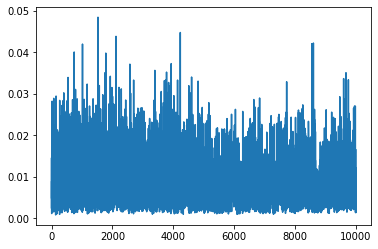

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.figure
plt.plot(error_tes,label="error_test")


In [ ]:
#Seleccionar el threshold a partir del error de reconstrucción (por ejemplo  error_test > 0.04)
img_anomala=error_tes>0.038
img_anomala
index_anomalies=np.where(img_anomala)[0]
print(index_anomalies)

[ 744 1017 1526 1782 2118 4230 8553 8563 8602]


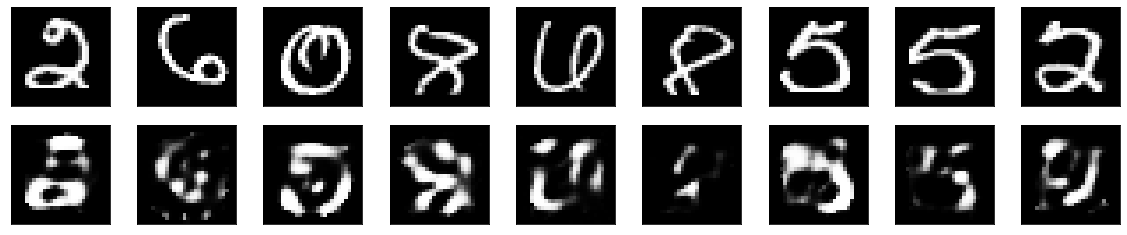

In [ ]:
# Mostramos las imágenes con mayor error de reconstrucción en la base de datos
import matplotlib.pyplot as plt

j=0
plt.figure(figsize=(20, 4))
for i in index_anomalies:
    # display original
    ax = plt.subplot(2, len(index_anomalies), j + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruccion
    ax = plt.subplot(2, len(index_anomalies), j + 1 + len(index_anomalies))
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j=j+1
plt.show()

#### Generar imágenes anómalas (outliers) y comprobar que son detectables a partir del error de reconstrucción 

In [ ]:
import numpy as np

X_test_anom = x_test.copy()

#Distintos tipos de anomalías

# Zero
#X_test_anom[1000,:] = np.ones((1,X_test_anom.shape[1]))*0

# Max
#X_test_anom[1000,:] = np.ones((1,X_test_anom.shape[1]))*x_test.max()

# Negativo
X_test_anom[1000,:] = np.ones((1,X_test_anom.shape[1]))-X_test_anom[1000,:]

# Multiplicado
#X_test_anom[1000,:] = 1.5*X_test_anom[1000,:]

# Ruido
#X_test_anom[1000,:] = X_test_anom[1000,:] + 0.5*np.random.randn(1,X_test_anom.shape[1])

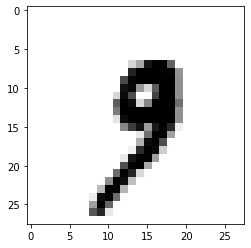

In [ ]:
plt.imshow(np.reshape(X_test_anom[1000,:],(28,28)))

In [ ]:

# calculamos el error en los datos reconstruidos

X_test_anom_pred = autoencoder.predict(X_test_anom)

error_tes = np.mean(np.abs(X_test_anom-X_test_anom_pred)**2,axis = 1)


In [ ]:
# Error en la imagen anómala
error_tes[1000]

0.8722987

In [ ]:
# Error en la imagen 1 de la base de datos.
error_tes[1]

0.0145872

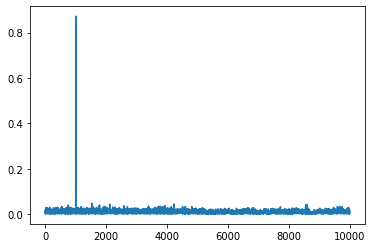

In [ ]:
# Mostramos el error en todas las imágenes reconstruidas. El valor más alto se corresponde con la imagen ruidosa.
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(error_tes)


# Ejercicios

1) Incrementa el número de capas y compara los resultados

# Ejercicios EXTRA

2) Compara los resultados de una capa con un PCA entrenado con sklearn